<a href="https://colab.research.google.com/github/nanaagyei/hands-on-ml/blob/main/Chapter3_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#### 1. Build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set.

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [18]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

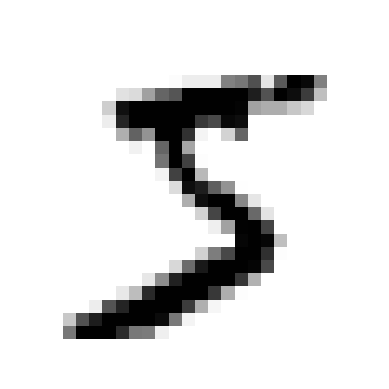

In [19]:
import matplotlib.pyplot as plt

def plot_digit(data):
  image = data.reshape(28, 28)
  plt.imshow(image, cmap='binary')
  plt.axis('off')
  plt.show()

some_digit = X[0]
plot_digit(some_digit)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier()

param_grid = [{
    'weights': ['uniform', 'distance'],
    'n_neighbors': [3, 5, 7],
}]

grid_search = GridSearchCV(knn_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [21]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [22]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values(by='mean_test_score', ascending=False)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,0.221875,0.010444,47.807636,0.796240,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.9704,0.96890,0.96870,0.969333,0.000759,1
3,0.227185,0.029489,47.021223,0.406700,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.9688,0.96795,0.96905,0.968600,0.000471,2
0,0.244669,0.014177,49.261277,0.917714,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.9690,0.96805,0.96750,0.968183,0.000620,3
2,0.229949,0.033542,48.315278,1.083905,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.9676,0.96710,0.96755,0.967417,0.000225,4
5,0.207857,0.003964,46.772775,0.674492,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.9670,0.96560,0.96740,0.966667,0.000772,5


In [23]:
from sklearn.metrics import accuracy_score

final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9717

In [ ]:
#### Exercise 2

from scipy.ndimage import shift

def shift_image(image, dx, dy):
  image = image.reshape((28, 28))
  image_shifted = shift(image, [dy, dx], cval=0, mode='constant')
  return image_shifted.reshape([-1])

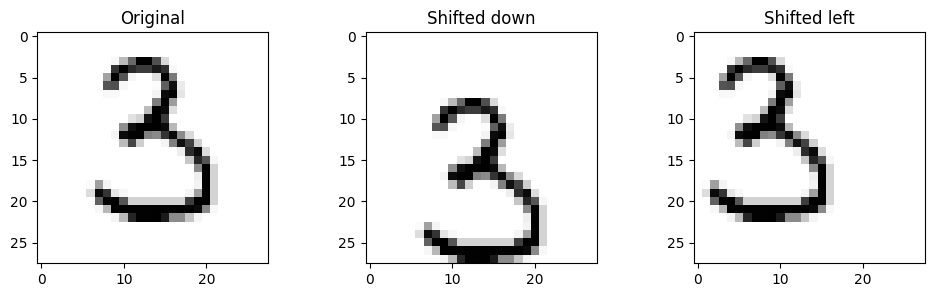

In [28]:
import numpy as np

random_index = np.random.randint(len(X_train))
image = X_train[random_index]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title("Original")
plt.imshow(image.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down")
plt.imshow(shifted_image_down.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left")
plt.imshow(shifted_image_left.reshape(28, 28),
           interpolation="nearest", cmap="Greys")

In [29]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
  for image, label in zip(X_train, y_train):
    X_train_augmented.append(shift_image(image, dx, dy))
    y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [30]:
shuffle_index = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_index]
y_train_augmented = y_train_augmented[shuffle_index]

In [31]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [32]:
augemented_accuracy = knn_clf.score(X_test, y_test)
augemented_accuracy

0.9763

In [33]:
### Exercise 3

from pathlib import Path
import urllib.request
import pandas as pd
import tarfile

def load_titanic_data():
  tarball_path = Path(r"/content/drive/MyDrive/Colab Notebooks/datasets/titanic.tgz")
  if not tarball_path.is_file():
    url = "https://github.com/ageron/data/raw/main/titanic.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as titanic_ball:
      titanic_ball.extractall(path=r"/content/drive/MyDrive/Colab Notebooks/datasets")
  return [pd.read_csv(Path("/content/drive/MyDrive/Colab Notebooks/datasets/titanic") / filename) for filename in ("train.csv", "test.csv")]

In [34]:
train_data, test_data = load_titanic_data()

In [35]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

In [40]:
train_data[train_data["Sex"] == "female"]["Age"].median()

27.0

In [41]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
train_data["Survived"].value_counts()

,count
Survived,
0,549
1,342
